#📌 Extracción

###Importar Datos##

In [1]:
import pandas as pd
import numpy as np

datos = pd.read_json('/content/TelecomX_Data.json')
datos.head()
list_of_records = datos.to_dict('records')
datos = pd.json_normalize(list_of_records)
datos


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


###Consultando Número de listas y columnas###

In [2]:
datos.shape

(7267, 21)

###Tipo de datos###

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#🔧 Transformación

###Crear y guardar una lista con nombres de columnas###

In [4]:
columnas = list(datos.columns)
columnas

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

### Manejo y conversión de tipos de datos###


In [5]:
datos['account.Charges.Total'] = datos['account.Charges.Total'].replace(' ', np.nan)
datos['account.Charges.Total']= datos['account.Charges.Total'].astype(np.float64)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [6]:
columnas_categoricas = ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies',
    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod'
]
for columnas in columnas_categoricas:
    datos[columnas] = datos[columnas].astype('category')

In [7]:
print(datos.dtypes)

customerID                     object
Churn                        category
customer.gender              category
customer.SeniorCitizen          int64
customer.Partner             category
customer.Dependents          category
customer.tenure                 int64
phone.PhoneService           category
phone.MultipleLines          category
internet.InternetService     category
internet.OnlineSecurity      category
internet.OnlineBackup        category
internet.DeviceProtection    category
internet.TechSupport         category
internet.StreamingTV         category
internet.StreamingMovies     category
account.Contract             category
account.PaperlessBilling     category
account.PaymentMethod        category
account.Charges.Monthly       float64
account.Charges.Total         float64
dtype: object


In [8]:
datos.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.90


###Nueva base de datos generada en extensión CSV###

In [9]:
datos.to_csv('datos_generados.csv')
datos.columns = [
    'ID_cliente', 'Cancelamento', 'Genero', 'Idoso', 'Tem_Conjuge', 'Tem_Dependentes',
    'Tempo_de_contrato', 'Telefone_Ativo', 'Multiplas_Linhas',
    'Tipo_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
    'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato',
    'Fatura_Digital', 'Metodo_Pagamento', 'Valor_Mensal', 'Valor_Total'
]

datos.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


###Tratando los datos nulos###

In [10]:
print(datos.isnull().sum())

ID_cliente               0
Cancelamento             0
Genero                   0
Idoso                    0
Tem_Conjuge              0
Tem_Dependentes          0
Tempo_de_contrato        0
Telefone_Ativo           0
Multiplas_Linhas         0
Tipo_Internet            0
Seguranca_Online         0
Backup_Online            0
Protecao_Dispositivo     0
Suporte_Tecnico          0
Streaming_TV             0
Streaming_Filmes         0
Tipo_Contrato            0
Fatura_Digital           0
Metodo_Pagamento         0
Valor_Mensal             0
Valor_Total             11
dtype: int64


In [11]:
print(datos[datos.isnull().any(axis=1)])


      ID_cliente Cancelamento  Genero  Idoso Tem_Conjuge Tem_Dependentes  \
975   1371-DWPAZ           No  Female      0         Yes             Yes   
1775  2520-SGTTA           No  Female      0         Yes             Yes   
1955  2775-SEFEE           No    Male      0          No             Yes   
2075  2923-ARZLG           No    Male      0         Yes             Yes   
2232  3115-CZMZD           No    Male      0          No             Yes   
2308  3213-VVOLG           No    Male      0         Yes             Yes   
2930  4075-WKNIU           No  Female      0         Yes             Yes   
3134  4367-NUYAO           No    Male      0         Yes             Yes   
3203  4472-LVYGI           No  Female      0         Yes             Yes   
4169  5709-LVOEQ           No  Female      0         Yes             Yes   
5599  7644-OMVMY           No    Male      0         Yes             Yes   

      Tempo_de_contrato Telefone_Ativo  Multiplas_Linhas Tipo_Internet  ...  \
975     

In [12]:
datos['Valor_Total']=datos['Valor_Total'].fillna('0.0')
print(datos.isnull().sum())

ID_cliente              0
Cancelamento            0
Genero                  0
Idoso                   0
Tem_Conjuge             0
Tem_Dependentes         0
Tempo_de_contrato       0
Telefone_Ativo          0
Multiplas_Linhas        0
Tipo_Internet           0
Seguranca_Online        0
Backup_Online           0
Protecao_Dispositivo    0
Suporte_Tecnico         0
Streaming_TV            0
Streaming_Filmes        0
Tipo_Contrato           0
Fatura_Digital          0
Metodo_Pagamento        0
Valor_Mensal            0
Valor_Total             0
dtype: int64


In [13]:
datos.to_json('datos_generados.json')

In [14]:
import pandas as pd
datos_normalizados = pd.read_json('/content/datos_generados.json')
datos_normalizados.head()


,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [15]:
print(datos_normalizados.isnull().sum())

ID_cliente              0
Cancelamento            0
Genero                  0
Idoso                   0
Tem_Conjuge             0
Tem_Dependentes         0
Tempo_de_contrato       0
Telefone_Ativo          0
Multiplas_Linhas        0
Tipo_Internet           0
Seguranca_Online        0
Backup_Online           0
Protecao_Dispositivo    0
Suporte_Tecnico         0
Streaming_TV            0
Streaming_Filmes        0
Tipo_Contrato           0
Fatura_Digital          0
Metodo_Pagamento        0
Valor_Mensal            0
Valor_Total             0
dtype: int64


In [16]:
datos_normalizados['Valor_Diario']= datos_normalizados['Valor_Mensal'] / 30
datos_normalizados.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total,Valor_Diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [17]:
datos_normalizados[['Valor_Diario','Valor_Total']]= datos_normalizados[['Valor_Diario','Valor_Total']].round(1)
datos_normalizados.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total,Valor_Diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.2
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.8,2.5
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.8,3.3
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.8


In [18]:
columnas_binarias = ['Cancelamento', 'Telefone_Ativo', 'Multiplas_Linhas', 'Idoso', 'Tem_Conjuge', 'Tem_Dependentes',
                    'Fatura_Digital', 'Protecao_Dispositivo','Suporte_Tecnico', 'Streaming_Filmes', 'Streaming_TV']
datos_normalizados[columnas_binarias] = datos_normalizados[columnas_binarias].replace({'Yes': 1, 'No': 0})
datos_normalizados.head()

/tmp/ipython-input-18-3047577513.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_normalizados[columnas_binarias] = datos_normalizados[columnas_binarias].replace({'Yes': 1, 'No': 0})


,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total,Valor_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.2
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.0
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.8,2.5
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.8,3.3
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.8


In [19]:
datos_normalizados['Tipo_Contrato'] = datos_normalizados['Tipo_Contrato'].replace({'Month-to-month': 'Mensal', 'One year': 'Fidelidade_12_meses', 'Two year': 'Fidelidade_24_meses'})
datos_normalizados['Metodo_Pagamento'] = datos_normalizados['Metodo_Pagamento'].replace({'Electronic check': 'Cheque_Eletronico', 'Mailed check': 'Cheque_Postado', 'Bank transfer (automatic)': 'Transferencia_Bancaria_Automática', 'Credit card (automatic)': 'Cartao_Credito_Automático'})
datos_normalizados.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total,Valor_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,Fidelidade_12_meses,1,Cheque_Postado,65.6,593.3,2.2
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensal,0,Cheque_Postado,59.9,542.4,2.0
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Mensal,1,Cheque_Eletronico,73.9,280.8,2.5
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Mensal,1,Cheque_Eletronico,98.0,1237.8,3.3
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Mensal,1,Cheque_Postado,83.9,267.4,2.8


In [20]:
datos_normalizados['Tipo_Internet'] = datos_normalizados['Tipo_Internet'].replace({'Fiber optic': 'Fibra_Optica', 'DSL': 'Linha_telefonica', 'No': 'Sem_internet'})
datos_normalizados.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total,Valor_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,Linha_telefonica,...,0,1,1,0,Fidelidade_12_meses,1,Cheque_Postado,65.6,593.3,2.2
1,0003-MKNFE,0,Male,0,0,0,9,1,1,Linha_telefonica,...,0,0,0,1,Mensal,0,Cheque_Postado,59.9,542.4,2.0
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fibra_Optica,...,1,0,0,0,Mensal,1,Cheque_Eletronico,73.9,280.8,2.5
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fibra_Optica,...,1,0,1,1,Mensal,1,Cheque_Eletronico,98.0,1237.8,3.3
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fibra_Optica,...,0,1,1,0,Mensal,1,Cheque_Postado,83.9,267.4,2.8


In [21]:
datos_normalizados['Genero']= datos_normalizados['Genero'].replace({'Female': 'Feminino', 'Male': 'Masculino'})
datos_normalizados.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total,Valor_Diario
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,Linha_telefonica,...,0,1,1,0,Fidelidade_12_meses,1,Cheque_Postado,65.6,593.3,2.2
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,Linha_telefonica,...,0,0,0,1,Mensal,0,Cheque_Postado,59.9,542.4,2.0
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra_Optica,...,1,0,0,0,Mensal,1,Cheque_Eletronico,73.9,280.8,2.5
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra_Optica,...,1,0,1,1,Mensal,1,Cheque_Eletronico,98.0,1237.8,3.3
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fibra_Optica,...,0,1,1,0,Mensal,1,Cheque_Postado,83.9,267.4,2.8


###Datos Media, Mediana y Desviación Estándar##

In [22]:
datos_normalizados.mean(numeric_only=True).round(2)

,0
Idoso,0.16
Tem_Conjuge,0.48
Tem_Dependentes,0.30
Tempo_de_contrato,32.35
Telefone_Ativo,0.90
Fatura_Digital,0.59
Valor_Mensal,64.72
Valor_Total,2277.18
Valor_Diario,2.16


In [23]:
datos_normalizados.median(numeric_only=True)

,0
Idoso,0.0
Tem_Conjuge,0.0
Tem_Dependentes,0.0
Tempo_de_contrato,29.0
Telefone_Ativo,1.0
Fatura_Digital,1.0
Valor_Mensal,70.3
Valor_Total,1389.2
Valor_Diario,2.3


In [24]:
datos_normalizados.std(numeric_only=True).round(2)

,0
Idoso,0.37
Tem_Conjuge,0.50
Tem_Dependentes,0.46
Tempo_de_contrato,24.57
Telefone_Ativo,0.30
Fatura_Digital,0.49
Valor_Mensal,30.13
Valor_Total,2268.65
Valor_Diario,1.00


###Datos por Item###

In [25]:
datos_normalizados.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total,Valor_Diario
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,Linha_telefonica,...,0,1,1,0,Fidelidade_12_meses,1,Cheque_Postado,65.6,593.3,2.2
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,Linha_telefonica,...,0,0,0,1,Mensal,0,Cheque_Postado,59.9,542.4,2.0
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra_Optica,...,1,0,0,0,Mensal,1,Cheque_Eletronico,73.9,280.8,2.5
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra_Optica,...,1,0,1,1,Mensal,1,Cheque_Eletronico,98.0,1237.8,3.3
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fibra_Optica,...,0,1,1,0,Mensal,1,Cheque_Postado,83.9,267.4,2.8


In [26]:
print(datos_normalizados['Genero'].value_counts())
print(datos_normalizados['Tipo_Internet'].value_counts())
print(datos_normalizados['Tipo_Contrato'].value_counts())
print(datos_normalizados['Metodo_Pagamento'].value_counts())
print(datos_normalizados['Cancelamento'].unique())


Genero
Masculino    3675
Feminino     3592
Name: count, dtype: int64
Tipo_Internet
Fibra_Optica        3198
Linha_telefonica    2488
Sem_internet        1581
Name: count, dtype: int64
Tipo_Contrato
Mensal                 4005
Fidelidade_24_meses    1743
Fidelidade_12_meses    1519
Name: count, dtype: int64
Metodo_Pagamento
Cheque_Eletronico                    2445
Cheque_Postado                       1665
Transferencia_Bancaria_Automática    1589
Cartao_Credito_Automático            1568
Name: count, dtype: int64
[0 1 '']


In [27]:
datos_normalizados['Cancelamento'] = datos_normalizados['Cancelamento'].replace({0: 'No', 1: 'Si', '': 'Desconocido'})
datos_normalizados['Cancelamento'].value_counts()

,count
Cancelamento,
No,5174
Si,1869
Desconocido,224


#📊 Carga y análisis

###Graficas de los datos proceso de análisis###

In [28]:
datos_normalizados.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total,Valor_Diario
0,0002-ORFBO,No,Feminino,0,1,1,9,1,0,Linha_telefonica,...,0,1,1,0,Fidelidade_12_meses,1,Cheque_Postado,65.6,593.3,2.2
1,0003-MKNFE,No,Masculino,0,0,0,9,1,1,Linha_telefonica,...,0,0,0,1,Mensal,0,Cheque_Postado,59.9,542.4,2.0
2,0004-TLHLJ,Si,Masculino,0,0,0,4,1,0,Fibra_Optica,...,1,0,0,0,Mensal,1,Cheque_Eletronico,73.9,280.8,2.5
3,0011-IGKFF,Si,Masculino,1,1,0,13,1,0,Fibra_Optica,...,1,0,1,1,Mensal,1,Cheque_Eletronico,98.0,1237.8,3.3
4,0013-EXCHZ,Si,Feminino,1,1,0,3,1,0,Fibra_Optica,...,0,1,1,0,Mensal,1,Cheque_Postado,83.9,267.4,2.8


In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
dados_filtrados = datos_normalizados[
    datos_normalizados['Cancelamento'].notna() &
    (datos_normalizados['Cancelamento'].astype(str).str.strip() != '') &
    (datos_normalizados['Cancelamento'].astype(str).str.strip() != '0')
]

/tmp/ipython-input-31-2301473768.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Cancelamento', y='count', palette='Set2')


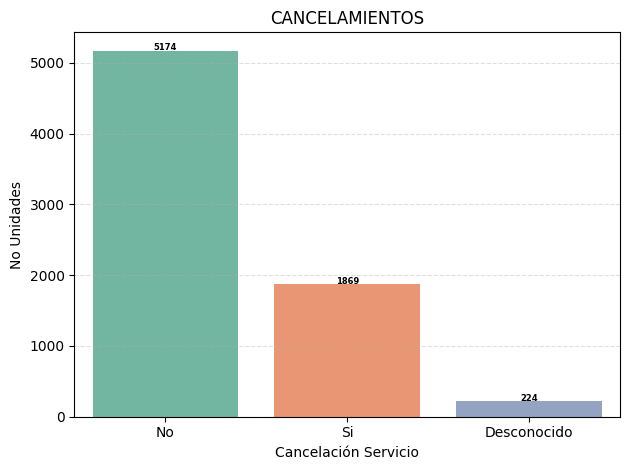

In [31]:
df = pd.DataFrame({
    'Cancelamento': ['No', 'Si', 'Desconocido'],
    'count': [5174, 1869, 224]
})


ax = sns.barplot(data=df, x='Cancelamento', y='count', palette='Set2')
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, altura + 40, f'{int(altura)}',
            ha='center', va='center', fontsize=6, fontweight='bold')
plt.title('CANCELAMIENTOS')
plt.xlabel('Cancelación Servicio')
plt.ylabel('No Unidades')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [32]:
dados_filtrados = datos_normalizados[
    datos_normalizados['Genero'].notna() &
    (datos_normalizados['Genero'].astype(str).str.strip() != '') &
    (datos_normalizados['Genero'].astype(str).str.strip() != '0')
]


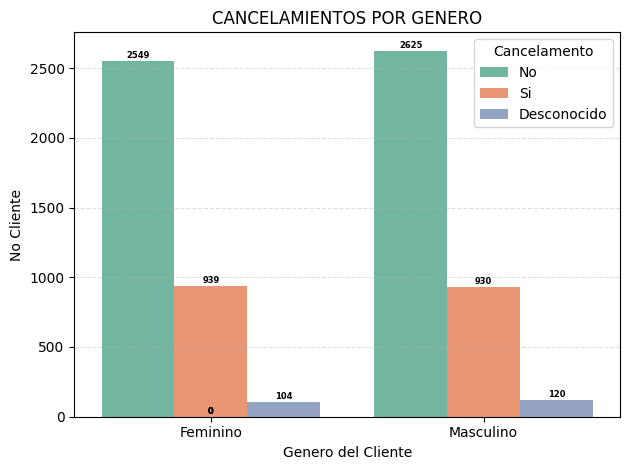

In [33]:
ax = sns.countplot(data=datos_normalizados, x='Genero', hue='Cancelamento', palette='Set2')
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, altura + 40, f'{int(altura)}',
            ha='center', va='center', fontsize=6, fontweight='bold')
plt.title('CANCELAMIENTOS POR GENERO')
plt.xlabel('Genero del Cliente')
plt.ylabel('No Cliente')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [34]:
datos_filtrados = datos_normalizados[
    datos_normalizados['Tipo_Contrato'].notna() &
    (datos_normalizados['Tipo_Contrato'].astype(str).str.strip() != '') &
    (datos_normalizados['Tipo_Contrato'].astype(str).str.strip() != '0')]

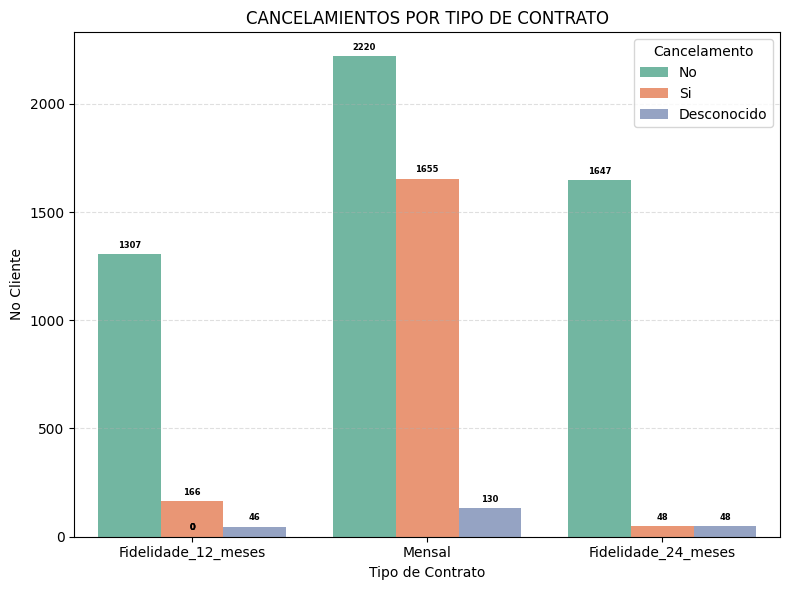

In [67]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(data=datos_normalizados, x='Tipo_Contrato', hue='Cancelamento', palette='Set2')
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, altura + 40, f'{int(altura)}',
            ha='center', va='center', fontsize=6, fontweight='bold')
plt.title('CANCELAMIENTOS POR TIPO DE CONTRATO')
plt.xlabel('Tipo de Contrato')
plt.ylabel('No Cliente')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [36]:
dados_filtrados = datos_normalizados[
    datos_normalizados['Cancelamento'].notna() &
    (datos_normalizados['Cancelamento'].astype(str).str.strip() != '') &
    (datos_normalizados['Cancelamento'].astype(str).str.strip() != '0')
]

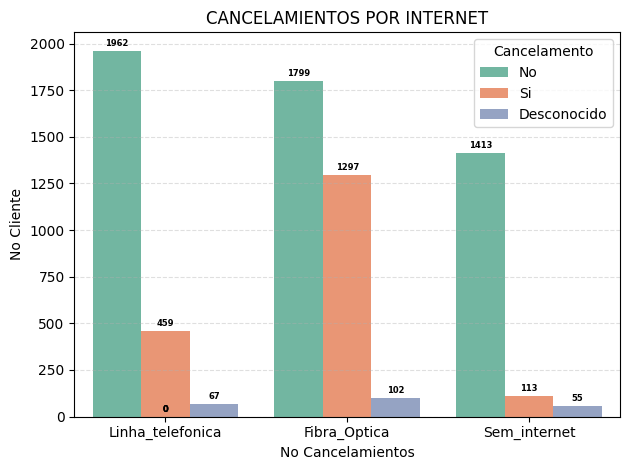

In [37]:
ax = sns.countplot(data=datos_normalizados, x='Tipo_Internet', hue='Cancelamento', palette='Set2')
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, altura + 40, f'{int(altura)}',
            ha='center', va='center', fontsize=6, fontweight='bold')
plt.title('CANCELAMIENTOS POR INTERNET')
plt.xlabel('No Cancelamientos')
plt.ylabel('No Cliente')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [38]:
dados_filtrados = datos_normalizados[
    datos_normalizados['Cancelamento'].notna() &
    (datos_normalizados['Cancelamento'].astype(str).str.strip() != '') &
    (datos_normalizados['Cancelamento'].astype(str).str.strip() != '0')
]

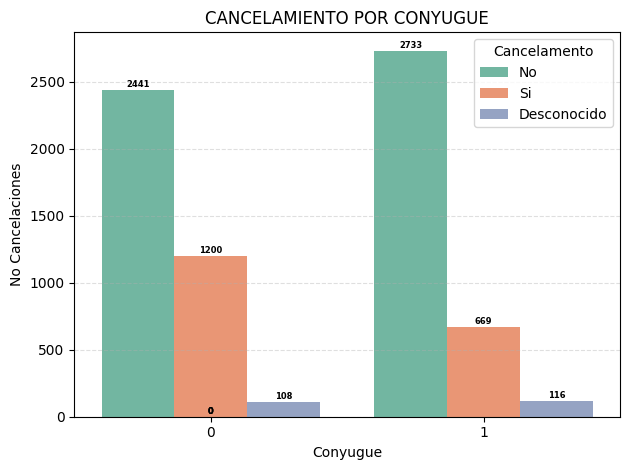

In [40]:
ax = sns.countplot(data=datos_normalizados, x='Tem_Conjuge', hue='Cancelamento', palette='Set2')
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, altura + 40, f'{int(altura)}',
            ha='center', va='center', fontsize=6, fontweight='bold')
plt.title('CANCELAMIENTO POR CONYUGUE')
plt.xlabel('Conyugue')
plt.ylabel('No Cancelaciones')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [41]:
dados_filtrados = datos_normalizados[
    datos_normalizados['Cancelamento'].notna() &
    (datos_normalizados['Cancelamento'].astype(str).str.strip() != '') &
    (datos_normalizados['Cancelamento'].astype(str).str.strip() != '0')
]

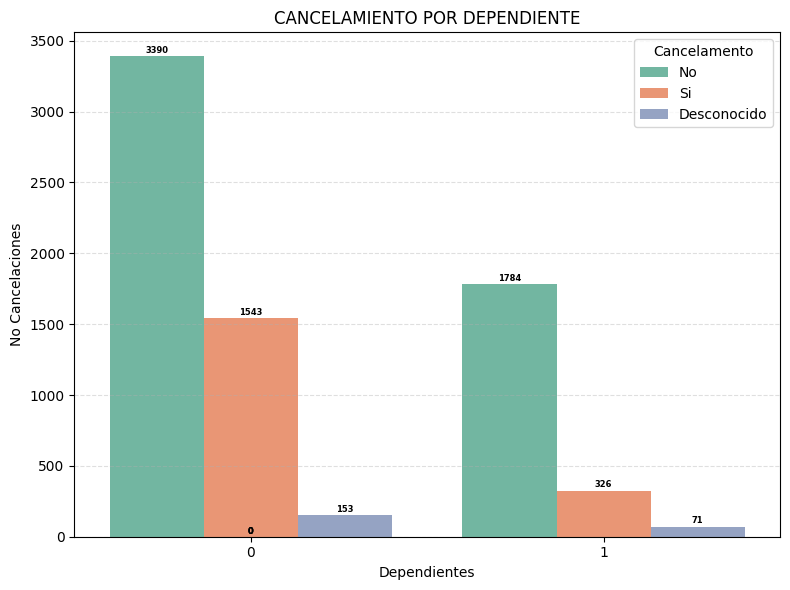

In [65]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(data=datos_normalizados, x='Tem_Dependentes', hue='Cancelamento', palette='Set2')
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, altura + 40, f'{int(altura)}',
            ha='center', va='center', fontsize=6, fontweight='bold')
plt.title('CANCELAMIENTO POR DEPENDIENTE')
plt.xlabel('Dependientes')
plt.ylabel('No Cancelaciones')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [43]:
dados_filtrados = datos_normalizados[
    datos_normalizados['Cancelamento'].notna() &
    (datos_normalizados['Cancelamento'].astype(str).str.strip() != '') &
    (datos_normalizados['Cancelamento'].astype(str).str.strip() != '0')
]

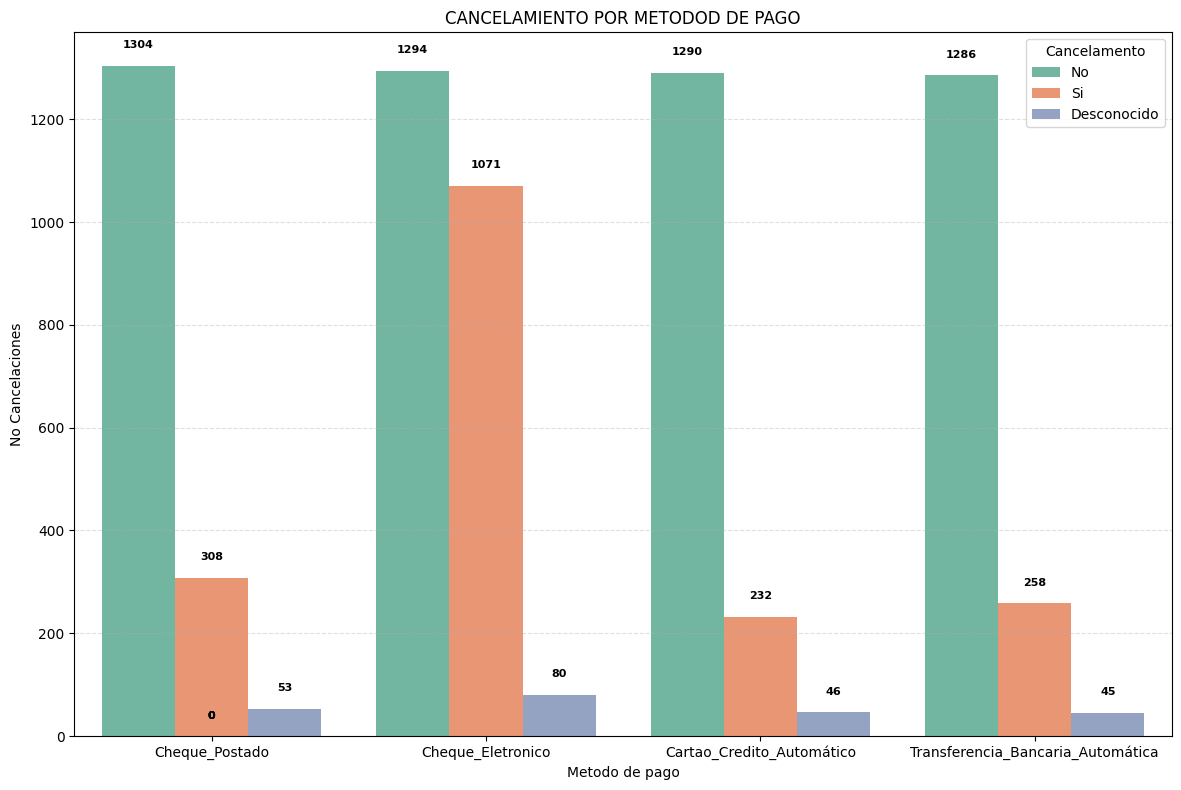

In [63]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(data=datos_normalizados, x='Metodo_Pagamento', hue='Cancelamento', palette='Set2')
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width()/2 , altura + 40, f'{int(altura)}',
            ha='center', va='center', fontsize=8, fontweight='bold')
plt.title('CANCELAMIENTO POR METODOD DE PAGO')
plt.xlabel('Metodo de pago')
plt.ylabel('No Cancelaciones')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [69]:
print(datos_normalizados.isnull().sum())

ID_cliente              0
Cancelamento            0
Genero                  0
Idoso                   0
Tem_Conjuge             0
Tem_Dependentes         0
Tempo_de_contrato       0
Telefone_Ativo          0
Multiplas_Linhas        0
Tipo_Internet           0
Seguranca_Online        0
Backup_Online           0
Protecao_Dispositivo    0
Suporte_Tecnico         0
Streaming_TV            0
Streaming_Filmes        0
Tipo_Contrato           0
Fatura_Digital          0
Metodo_Pagamento        0
Valor_Mensal            0
Valor_Total             0
Valor_Diario            0
dtype: int64


/tmp/ipython-input-71-3571929716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_normalizados, x='Cancelamento'=='sim', y='Valor_Total', palette='Set2')


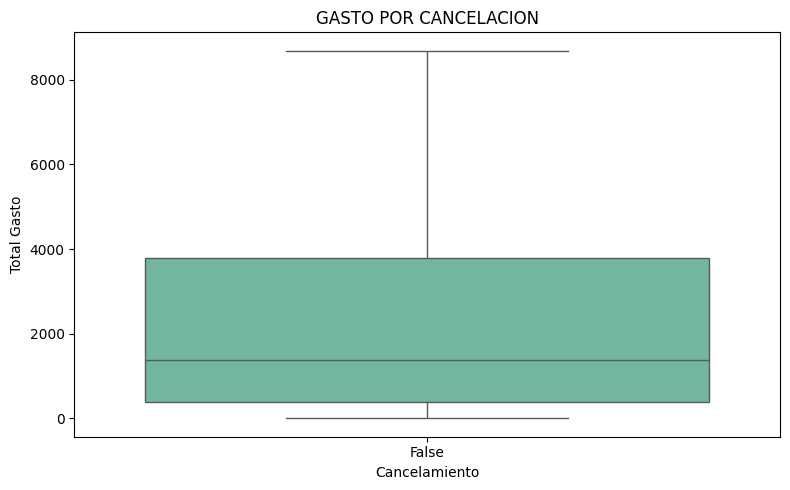

In [71]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos_normalizados, x='Cancelamento'=='sim', y='Valor_Total', palette='Set2')

plt.title('GASTO POR CANCELACION')
plt.xlabel('Cancelamiento')
plt.ylabel('Total Gasto')
plt.tight_layout()
plt.show()

/tmp/ipython-input-72-911080449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_normalizados, x='Cancelamento', y='Valor_Total', palette='Set2')


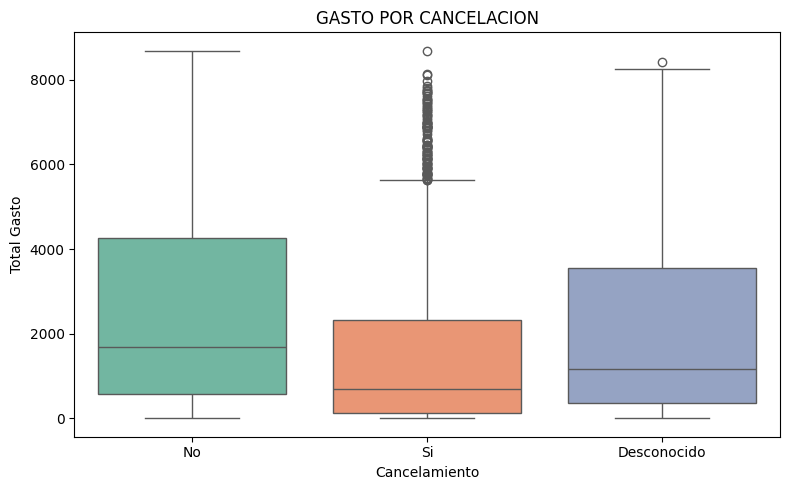

In [72]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos_normalizados, x='Cancelamento', y='Valor_Total', palette='Set2')

plt.title('GASTO POR CANCELACION')
plt.xlabel('Cancelamiento')
plt.ylabel('Total Gasto')
plt.tight_layout()
plt.show()

/tmp/ipython-input-73-1921064143.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_normalizados, x='Cancelamento', y='Tempo_de_contrato', palette='Set2')


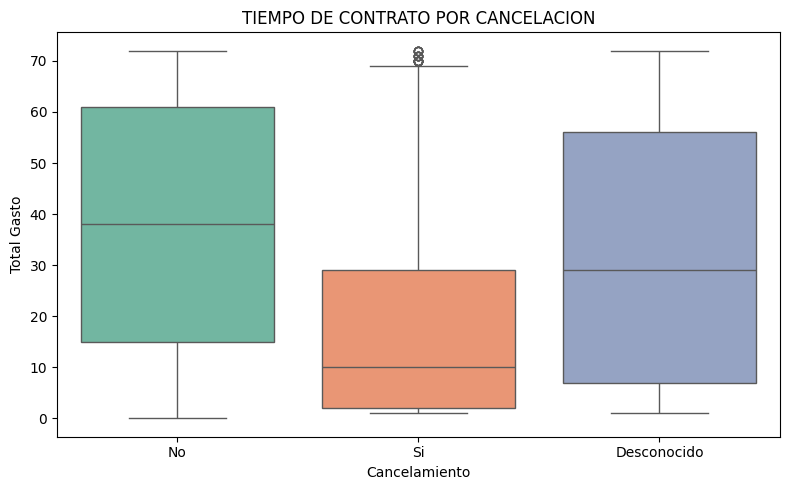

In [73]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos_normalizados, x='Cancelamento', y='Tempo_de_contrato', palette='Set2')

plt.title('TIEMPO DE CONTRATO POR CANCELACION')
plt.xlabel('Cancelamiento')
plt.ylabel('Total Gasto')
plt.tight_layout()
plt.show()

#📄Informe final

###🔹 Introducción:###

El objetivo del presente trabajo, es realizar un análisis de la base de datosnde la empresa TelecomX y comprender el problema de evasión de clientes (Churn).


###🔹 Limpieza y Tratamiento de Datos:###
 Una vez importados los datos del enlace aportado en la pagina de GitHub con extensión de Json., se procese a trabajar los mismos en la pagina de Colab soportados en la cuenta Gmail, utilizando las bibliotecas:pandas, numpy, seaborn, matplotlib.pyplot, con el fin de procesar los mismos (crear lista, columna, conversion e identiifcacion de datos, identificacion valores nulos, normalizacion y estandarizacion, para la creacion del Data frame nuevo.

###🔹 Análisis Exploratorio de Datos:###

Con la ayuda de las bibliotecas seaborn, matplotlib, se procede a la generacion de  gráficos y visualizacionesPresenta comparativas de los análisis realizados en los diferentes item de la base de datos, calculo y representación grafica de Datos Media, Mediana y Desviación Estándar con el fin de identificar patrones.

###🔹 Conclusiones e Insights:###

1) Alta retención general:
La mayoría de los clientes no cancelan el servicio, lo cual indica una base sólida, pero existe un grupo importante que sí cancela, y es allí donde deben centrarse las acciones correctivas.

2) El tipo de contrato influye significativamente:
Los contratos mensuales presentan una tasa de cancelación mucho más alta que los contratos de fidelización (12 o 24 meses). Esto sugiere que los compromisos a largo plazo mejoran la retención.

3) El tipo de conexión a internet es determinante:
Los clientes con Fibra Óptica tienen la mayor tasa de cancelación, lo que podría señalar problemas de calidad del servicio, soporte o percepción de valor.

4) Factores personales como cónyuge o dependientes impactan la decisión de cancelar:
Clientes con cónyuge o dependientes tienden a cancelar menos, posiblemente porque ven el servicio como más necesario para su entorno familiar.

5) El método de pago está relacionado con la retención:
Los métodos de pago automático (tarjeta o transferencia) están asociados con menores tasas de cancelación, mientras que los pagos con cheque electrónico tienen la mayor evasión.

6) Gasto total y tiempo de contrato son variables críticas:
Los clientes que gastan más y tienen mayor antigüedad en el contrato cancelan menos. Esto indica que la fidelidad está vinculada con mayor inversión y permanencia.

###🔹 Recomendaciones:###

1. Promover planes de fidelización a largo plazo
¿Por qué? Los contratos de 12 y 24 meses tienen tasas de cancelación más bajas.

Estrategias:

Ofrecer descuentos exclusivos por firmar contratos a 12 o 24 meses.

Incluir bonificaciones (como instalación gratuita o velocidad extra) por permanencia.

Implementar un programa de recompensas por renovación anticipada.

2. Mejorar la experiencia de clientes con Fibra Óptica
¿Por qué? Son quienes más cancelan, posiblemente por problemas técnicos o expectativas no cumplidas.

Estrategias:

Auditar y mejorar la calidad técnica del servicio (velocidad, estabilidad).

Fortalecer el soporte técnico especializado para estos clientes.

Realizar encuestas post-instalación para detectar insatisfacción temprana.

3. Fomentar el uso de métodos de pago automáticos
¿Por qué? Clientes con pagos automáticos cancelan menos.

Estrategias:

Aplicar incentivos o descuentos por domiciliar pagos (tarjeta o transferencia automática).

Facilitar el proceso de cambio de método de pago en todos los canales.

Enviar recordatorios y tutoriales sobre los beneficios de automatizar los pagos.

4. Diseñar campañas personalizadas para clientes con alto riesgo de cancelación
¿Por qué? Los clientes sin cónyuge o dependientes cancelan más.

Estrategias:

Crear perfiles de riesgo de evasión y aplicar campañas focalizadas (descuentos, llamadas de retención).

Usar mensajes emocionales o funcionales para reforzar el valor del servicio según el perfil del cliente.

Ofrecer beneficios familiares a quienes aún no los tienen (por ejemplo: planes compartidos).

5. Fortalecer la relación con clientes de bajo gasto y poca antigüedad
¿Por qué? Son los más propensos a cancelar.

Estrategias:

Diseñar un plan de bienvenida o acompañamiento para los primeros 6 meses.

Implementar un sistema de alertas tempranas (baja actividad, quejas frecuentes).

Activar campañas de engagement y educación del cliente (cómo aprovechar al máximo el servicio).

6. Limpiar y enriquecer la base de datos
¿Por qué? Hay varios registros con información desconocida (género, cónyuge, método de pago, etc.).

Estrategias:

Establecer un plan de actualización de datos con incentivos.

Obligar la validación de datos clave en renovaciones o cambios de plan.

Usar IA o lógica predictiva para completar o validar datos faltantes.